<a href="#Overview"></a>
# Overview
* <a href="#f7311e24-72f9-4cfe-ad10-b24821e48e50">Working with z-stack images</a>
  * <a href="#3504804c-af66-4070-9a17-8b0ae80a6f24">Introduction</a>
  * <a href="#0c1e9741-c0e3-4d0f-a7e1-4685b0e72584">Data</a>
  * <a href="#ace409e6-ef1b-4395-b27c-94d289cdcdbe">Objectives</a>
  * <a href="#f54f2d45-e471-4136-88d2-5bccf5309d9d">3rd party packages</a>
    * <a href="#697ad41e-b731-43fd-926d-beb7de988f6c">Using `pip`</a>
    * <a href="#b25a3090-7d67-4095-8b6b-7028db1e16e1">Other packages</a>
  * <a href="#5f29a6ab-a1fa-4b5d-b34f-94ea4ff3a905">Loading the data</a>
  * <a href="#0e91f834-9090-49ba-83a9-5df68a4f3aa2">What is a maximum intensity projection?</a>
  * <a href="#13e365fb-731c-46dd-91ac-566ac9a1208e">List operations</a>
    * <a href="#5282e709-123f-4c68-b3ca-a1cac2a75bf1">Exercise 1</a>
      * <a href="#fab9dd04-9498-4403-b217-3c06d63bc067">Practice with lists and NumPy arrays</a>
      * <a href="#5be4183f-5a6f-4e04-84ee-3fb682d8a6a2">1. One-dimensional lists</a>
      * <a href="#798a2cf7-6897-4f50-bf1f-7bf547616873">2. Two-dimensional lists</a>
      * <a href="#8a0ffbf2-bbbc-4f1e-bbef-f675f3492607">3. Two-dimensional arrays</a>
      * <a href="#96575a00-fc1a-4d1c-8ec7-42dcd30ca48b">4. Finding the maximum of one dimension in an array</a>
  * <a href="#6c1a3615-6709-4339-8ada-479255717f6e">Plotting our MIP</a>
    * <a href="#404fae97-a8c1-471f-a52b-a49dfd27b786">Exercise 2</a>
      * <a href="#fc6cada3-fa85-4797-acc0-2b5219abe968">Plotting our MIP</a>
  * <a href="#0344a55e-08df-4d41-8c68-40d63e21e1d8">Exporting our MIP as a new TIF file</a>
    * <a href="#193e433a-7cb7-4528-b2f4-6dd34f0fdd4c">Excercise 3</a>
      * <a href="#844b2563-3eda-4ab0-976c-7efaa912facd">Exporting our MIP</a>
  * <a href="#ee0d0ccc-26db-4b61-b6c4-5f53484fc044">Defining functions</a>
    * <a href="#c5e9729f-8219-4358-ad16-3c91df86cda7">Exercise 3</a>
      * <a href="#d239fd26-7ff6-471d-aabf-ee78366b6202">Defining a function to create a MIP from our .czi file</a>
    * <a href="#9ebad2b0-9618-461d-825f-4eff159d1644">Exercise 4</a>
      * <a href="#0d30a5d1-0dab-4309-bfb3-be90de705adc">Creating an orthogonal image from a z-stack</a>
  * <a href="#a454acde-d867-469a-baab-5eb6bdf52c91">Automating</a>
    * <a href="#8a70647c-c2f9-42af-9865-f39efa14810d">Exercise 5</a>
  * <a href="#0dff5c0b-e8e7-452d-96aa-75fbdb006fb6">Useful resources</a>

<a id="f7311e24-72f9-4cfe-ad10-b24821e48e50"></a>
# Working with z-stack images
<a href="#Overview">Return to overview</a>


<a id="3504804c-af66-4070-9a17-8b0ae80a6f24"></a>
## Introduction
<a href="#Overview">Return to overview</a>

**The problem:** You are screening a lot of tissue samples on a confocal microscope, creating many z-stack 3-dimensional images. In order to examine all of your images in a timely manner you want to to create a representative 2-dimensional image from each of your z-stack images. In this case, a maximum intensity projection will do the trick but the microscope software only allows you to make these one at a time and this takes a long time. Ideally you would like to automate this and write a script that can iterate through all of your images and create maximum intensity projections for all of your images in batch. Python allows us to do this, but how?

**The answer:** NumPy arrays!

This notebook will demonstrate how 3-dimensional microscopy image data can be loaded into a NumPy array and manipulated mathematically. The 3-D image consists of a series of 2-D pictures taken of a section of tissue at various depths (the "z" dimension). The collection of 2-D slices is known as a z-stack. The "data" that will be loaded into the NumPy array from the image will be the intensity value (how bright the color is) of every pixel for each slice.

It can be easier to analyze -- and easier to visualize -- a single image than a whole series of images. Thus, a common practice when analyzing 3-D microscopy data is to create a maximum intensity projection, or a single image that combines all of the slices in the z-stack. The final image will have the same X and Y dimensions as the other slices, but the intensity value for each (X,Y) pixel coordinate will be whatever the highest intensity value was for that coordinate across each of the z slices. Thus, the brightest possible image will be displayed, and all of the important structures throughout the tissue can be seen in the single image. This notebook will cover how to mathematically create a maximum intensity projection (MIP) from a z-stack loaded into a NumPy array.

It is also important to export the resulting MIP image so it can be viewed or analyzed with other standard software. This notebook will save the image into a .tif file format, which is a commonly used high-quality file format.

Additionally, it can be interesting or useful to visualize the 3-D tissue from a different angle. This notebook will demonstrate how to generate an orthogonal image to view the tissue section when it is turned 90 degrees to the left or right.

Lastly, this notebook will define functions to automate the creation of MIP and orthogonal images (saved as TIFs) for all microscopy images in a folder, which is ultimately much faster than manually using the microscope software to do this.

<a id="0c1e9741-c0e3-4d0f-a7e1-4685b0e72584"></a>
## Data
<a href="#Overview">Return to overview</a>
For this exercise we will be working with 3-D images of a nerve in the peripheral nervous system of _Drosophila melanogaster_. In these images there are approximately 40 neurons, and their axons are labeled with green fluorescent protein (GFP) for visualization. The image location is depicted below in the diagram by the box, and a 3-D rendering of the axon bundle is shown below that showing the X, Y and Z axes.
<br><br>Wing diagram adapted from _Neukomm et al. 2014 PNAS_
<img src="wing_diagram.png" style="width: 500px"/>

<br>3-D rendering of the axon bundle
<br><img src="image1_3D.png"/>

<a id="ace409e6-ef1b-4395-b27c-94d289cdcdbe"></a>
## Objectives
<a href="#Overview">Return to overview</a>
The goal of this exercise is to learn a few basic principles that will help you work with 3-Dimensional image data using Python. We will be working with czi files in this exercise, but there are similar libraries for other file formats such as [TIF](https://pypi.org/project/tifffile/) and [HDF5](https://www.h5py.org/).

The goals of this exercise are as follows:
- Identify tools available for working with 3-D image data
- Become familiar with how 3-D (or any dimensional) image data is stored in NumPy arrays and can be accessed and spliced
    - practice this using a couple of common practices for displaying 3-D data
- Learn how to convert our modified NumPy array data back into a new image file
- Learn how to use these techniques to automate image processing

<a id="f54f2d45-e471-4136-88d2-5bccf5309d9d"></a>
## 3rd party packages
<a href="#Overview">Return to overview</a>

First, we need to a library that will allow us to access the data in our image files and utilize the data. Here we are using **czifile** which is a module for opening the propritary czi file format from Carl Zeiss Zen software. This was created by Christoph Gohlke from UC Irvine. Documentation regarding czifile is available on [GitHub](https://github.com/AllenCellModeling/czifile) or [Czifile](https://www.pydoc.io/pypi/czifile-0.1.1/autoapi/czifile/index.html). This module is available through `pip` on PyPI (the Python package index). 

<a id="697ad41e-b731-43fd-926d-beb7de988f6c"></a>
### Using `pip`
<a href="#Overview">Return to overview</a>

`pip` is the default package installer for Python. Anaconda also has their own package manager, but for this lesson we will be using `pip`. `pip` should come prebundled when you install Python or Anaconda. 

Open another window of the `anaconda prompt`. Lets look at a list of the current packages installed: type `pip list` and hit enter. You should see a short list of installed packages, but `czifile` is not among them. Let's test that out. If we run the following cell trying to import `czifile`, Python will raise an error letting us know that the module could not be found.

In [1]:
# this will raise an ImportError
import czifile

Let's install `czifile` now. In the `anaconda prompt` you just opened, type in `pip install czifile` and hit enter. When it's done, if we do `pip list` again, we should now see `czifile` as a package listed! Let's try importing our new package again. Go ahead and rerun the above cell and see if package gets imported successfully.

In some cases, Jupyter won't automatically detect that a new package was installed. Each notebook runs a Python instance called a `kernel`, and we'll have to restart our notebook's kernel. To refresh the kernel for our notebook, in the menu options, go to `Kernel -> Restart`. When that happens, importing `czifile` should now work as our kernel can now find the newly installed package. Restarting the kernel also clears out all variables that existed in the notebook, so be careful when doing this in the future.

<a id="b25a3090-7d67-4095-8b6b-7028db1e16e1"></a>
### Other packages
<a href="#Overview">Return to overview</a>


We will also import the [NumPy](http://www.numpy.org/) library as np which will allow us to work with the data as an array. [Path](https://docs.python.org/3.6/library/pathlib.html) allows Python to access documents via file handles through directories. [Matplotlib](https://matplotlib.org/) is a library that will allow us to plot the image data from the NumPy array. Finally, we will import [Pillow](https://pillow.readthedocs.io/en/latest/#) which will allow us to write out new TIF files after we create our new images. `%matplotlib inline` just tells the Jupyter notebook to plot the images from Matplotlib in the notebook so that we can see them.

In [49]:
import czifile
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

<a id="5f29a6ab-a1fa-4b5d-b34f-94ea4ff3a905"></a>
## Loading the data
<a href="#Overview">Return to overview</a>


Let's get started. Provide the file path so the computer knows where to look for the data. The print function confirms that the file exist.

In [3]:
fh = 'Images/image1.czi'

print("File exists: " + str(Path(fh).exists()))

File exists: True


Load the file into an array called `my_image`. It is important to close the file once we are done using it (i.e. once it has been loaded into an array).

An old approach to closing the file would be as follows:

    try:
        czi = czifile.CziFile(fh)
        # use czifile's method, CziFile, to read data from the file path "fh" into the variable "czi"
    
        my_image = czi.asarray()
        # store the data in an array called "image"
        
    finally:
        czi.close()
        # close the file


Instead, we will use a `with/as` statement to simplify the process. The `with/as` statement will close the image file properly on its own. These are called "context managers" and help ensure data is handled properly

In [4]:
with czifile.CziFile(fh) as czi:
    my_image = czi.asarray()

# Print the array's shape    
print(my_image.shape)

(1, 1, 58, 191, 380, 1)


/Users/svd/anaconda/envs/NEUS642/lib/python3.7/site-packages/czifile/czifile.py:400: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[index] = tile


Printing the shape gives us 6 dimensions, but what do these axes represent?

`czi` has a method known as `axes` which will identify the dimensions for us. We will also print the long form of the labels for clarity. To put each label on a new line during our print statement, we will use `/n` wherever we want to create a line break.

In [5]:
print(czi.axes)
print('T = Time\nC = Channel\nZ = z-axis\nY = y-axis\nX = x-axis\n0 = Sampleshape')

TCZYX0
T = Time
C = Channel
Z = z-axis
Y = y-axis
X = x-axis
0 = Sampleshape


<a id="0e91f834-9090-49ba-83a9-5df68a4f3aa2"></a>
## What is a maximum intensity projection?
<a href="#Overview">Return to overview</a>

If we think about our z-stack as a 3D image, it has X, Y, and Z axes. If you have worked with maximum intensity images before, you know that the result is a 2D image where the Z axis gets compressed. In order to go from a 3D to 2D image in this way, you ask the computer to plot a new image where for each X,Y coordinate the computer goes through each of the Z values (each slice) and it calculates which value (voxel) is the greatest. The computer then plots that value for that X,Y coordinate and moves to the next coordinate. This ultimately results in a 2D image where for each X,Y coordinate, the maximum value within the Z axis is plotted. There are alternative ways of doing projections depending on what information you want, such as average intensity, etc., but the most commonly used is the maximum which we will use here.

First, let's examine the array structure. Look at the cell below before running it. Pay attention to the structure for each of the arrays and what each of the axes calculates when you find the maximum. When you have reviewed the data structures, run the cell.

In [6]:
# NumPy's max function will return the maximum of an array or maximum along an axis
np.max?

In [7]:
# 1-D array data structure (a list):
my_1D_array = [1, 2, 3, 4, 5]

print('1D max: ' + str(np.max(my_1D_array, axis = 0)))

1D max: 5


In [8]:
# 2-D array data structure (a list of lists)
my_2D_array = [[1, 2, 3, 4, 5],
               [5, 4, 3, 2, 1]]

print('2D max axis 0: ' + str(np.max(my_2D_array, axis = 0)))
print('2D max axis 1: ' + str(np.max(my_2D_array, axis = 1)))

2D max axis 0: [5 4 3 4 5]
2D max axis 1: [5 5]


In [9]:
# 3-D array data structure (a list of lists of lists)
my_3D_array = [
    [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]],
    [[5, 4, 3, 2, 1], [10, 9, 8, 7, 6], [15, 14, 13, 12, 11]]
]

print('3D max axis 0: \n' + str(np.max(my_3D_array, axis = 0)))
print('3D max axis 1: \n' + str(np.max(my_3D_array, axis = 1)))
print('3D max axis 2: \n' + str(np.max(my_3D_array, axis = 2)))

3D max axis 0: 
[[ 5  4  3  4  5]
 [10  9  8  9 10]
 [15 14 13 14 15]]
3D max axis 1: 
[[11 12 13 14 15]
 [15 14 13 12 11]]
3D max axis 2: 
[[ 5 10 15]
 [ 5 10 15]]


<a id="13e365fb-731c-46dd-91ac-566ac9a1208e"></a>
## List operations
<a href="#Overview">Return to overview</a>
Before we dive into the data, let's briefly go over some list operations. List splicing is useful for many applications. Here we will be using it to work with the 3D image data to gather data from each of the axes. Let's briefly go over some basics. As we have talked about before, list indicies start with 0. Also, list splicing is formated as `[start(inclusive):stop(exclusive):step]`. <br> Below is a list called `my_list`. Let's practice using list splicing to pull out some of the items from the list. 

<a id="5282e709-123f-4c68-b3ca-a1cac2a75bf1"></a>
### Exercise 1
<a href="#Overview">Return to overview</a>
<a id="fab9dd04-9498-4403-b217-3c06d63bc067"></a>
#### Practice with lists and NumPy arrays
<a href="#Overview">Return to overview</a>

<a id="5be4183f-5a6f-4e04-84ee-3fb682d8a6a2"></a>
#### 1. One-dimensional lists
<a href="#Overview">Return to overview</a>


In [10]:
my_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

How would you select for or print the **second item** from `my_list`?

In [11]:
my_list[0]

'a'

Print the last 4 items from `my_list`.

In [12]:
my_list[-4:]

['e', 'f', 'g', 'h']

Print every other item from `my_list` starting with the second item through the 2nd-to-last item.

In [13]:
my_list[1:-2]

['b', 'c', 'd', 'e', 'f']

<a id="798a2cf7-6897-4f50-bf1f-7bf547616873"></a>
#### 2. Two-dimensional lists
<a href="#Overview">Return to overview</a>

Here is a two-dimensional list where "rows" are delimited by the numbers 1-4, and "columns" are delimited by the letters a-b.

In [16]:
my_2D_list = [['1a', '1b', '1c', '1d'],
              ['2a', '2b', '2c', '2d'],
              ['3a', '3b', '3c', '3d'],
              ['4a', '4b', '4c', '4d']]

my_2D_list

[['1a', '1b', '1c', '1d'],
 ['2a', '2b', '2c', '2d'],
 ['3a', '3b', '3c', '3d'],
 ['4a', '4b', '4c', '4d']]

In the 1-D list from above (`my_list`), you could index that one dimension by using brackets after the variable name, e.g. <br>
`my_list[1]`

In **lists** with **multiple dimensions,** you need a new set of brackets to refer to each dimension, i.e. <br>
`my_2D_list[row][column]`

How would you select for item "4a" in `my_2D_list`?

In [17]:
my_2D_list[3][0]

'4a'

How would you select for all of the elements of row 1?

In [18]:
my_2D_list[0]

['1a', '1b', '1c', '1d']

How would you select for all of the elements of column 3 ("c")?

In [22]:
[my_2D_list[s][2] for s in range(4)]

['1c', '2c', '3c', '4c']

That returned all of **ROW 3** instead of all of **COLUMN 3.** Why didn't that work?

It's because we were using a list. Specifically, a 2D list is a list of lists, not a table of rows and columns. You can't put a colon in the first bracket (telling the program to "look at all of the lists"), and then only select for the 3rd element in each of those lists.

You can only specify a list in the first bracket, and then put a colon in the second bracket to indicate you want all of the elements in that cohesive list.

To treat the list like a table of rows and columns, we need to convert it into an array with NumPy.

<a id="8a0ffbf2-bbbc-4f1e-bbef-f675f3492607"></a>
#### 3. Two-dimensional arrays
<a href="#Overview">Return to overview</a>


In [23]:
#convert our 2D list into a 2D array:
my_2D_array = np.array(my_2D_list)
print(my_2D_array)

[['1a' '1b' '1c' '1d']
 ['2a' '2b' '2c' '2d']
 ['3a' '3b' '3c' '3d']
 ['4a' '4b' '4c' '4d']]


In lists, a new bracket specifies which dimension you are indexing, hence: <br>
`my_2D_list[0][1]`

The same format can be used in arrays, but you can also just use one bracket and delineate the dimensions with a comma:<br>
`my_2D_array[row, column]`

Using the single bracket format, how would you select for all of the elements of row 1?

In [25]:
my_2D_array[0,:]

array(['1a', '1b', '1c', '1d'], dtype='<U2')

How would you select for all of the elements of column 3 ("c")?

In [26]:
my_2D_array[:,2]

array(['1c', '2c', '3c', '4c'], dtype='<U2')

How many dimensions are represented by `my_2D_array`? If you weren't sure, you could find the shape of the array and count the number of axes it returns. Find the shape of `my_2D_array`.

In [28]:
my_2D_array.shape

(4, 4)

Save the result of `my_2D_array[0, :]` into a new variable called `row`.

In [30]:
row=my_2D_array[0,:]
row

array(['1a', '1b', '1c', '1d'], dtype='<U2')

How many dimensions are represented by `row`?

In [29]:
row.shape

(4,)

When you hold one of the dimensions constant (by looking only at row "0," not looking across multiple rows), then you are removing a dimension. Thus, a 2D array (`my_2D_array[:, :]`) can become a 1D array when specifying which row or column to look at (`my_2D_array[0, :]`).

This principle will come up again when we import our 6-D czi image dataset but only want to select for 3 of those dimensions: X, Y, and Z. We will hold the other dimensions constant by selecting an index for them.

Recall that our image data has 6 dimensions:<br>
TCZYX0<br>
where T = Time, C = Channel, and 0 = Sampleshape.

How would you extract a 3D array that encompasses just the Z, Y, and X axis dimensions? Recall that our image data is stored in the variable `my_image`.

In [34]:
my_image[0,0,:,:,:,0].shape

(58, 191, 380)

<a id="96575a00-fc1a-4d1c-8ec7-42dcd30ca48b"></a>
#### 4. Finding the maximum of one dimension in an array
<a href="#Overview">Return to overview</a>

Now let's use the `np.max()` to find the maximum value in the z-axis for each of the (X,Y) coordinates. Recall that the shape of our file has 6 dimensions `(1, 1, 58, 191, 380, 1)` but we only care about the (Z,Y,X). Therefore, to make things simpler and just work with those three dimensions, set the indicies to 0 for the other three dimensions (ie:  `image[0, 0, Z, Y, X, 0]`). Doing this allows us to work with the array as if it were three dimensions.

Reminder:  We saved our NumPy array with our image data as `my_image` using CziFile above.
<br><br>For more information regarding `np.max()` remember to use `np.max?`

How would you find the maximum value at each (X,Y) coordinate along the z-axis?

In [42]:
projection = np.max(my_image[0,0,:,:,:,0], axis=0)

What is the shape of this new data?

In [43]:
projection.shape

(191, 380)

Cool! Now our new maximum array only has two dimensions, Y and X.

<a id="6c1a3615-6709-4339-8ada-479255717f6e"></a>
## Plotting our MIP
<a href="#Overview">Return to overview</a>

We will use Matplotlib to display our maximum intensity projection from the czi file as a NumPy array. You can use `plt.imshow()` to display the image. 

<a id="404fae97-a8c1-471f-a52b-a49dfd27b786"></a>
### Exercise 2
<a href="#Overview">Return to overview</a>
<a id="fc6cada3-fa85-4797-acc0-2b5219abe968"></a>
#### Plotting our MIP
<a href="#Overview">Return to overview</a>

For information on Matplotlib function `imshow`, run this cell:

In [ ]:
plt.imshow?

Insert code to plot the maximum intensity projection along the z-axis of our image.

First create a variable `projection` and set it equal to the 2D array of the maximum along the z-axis.

Use `plt.imshow` to plot `projection`.

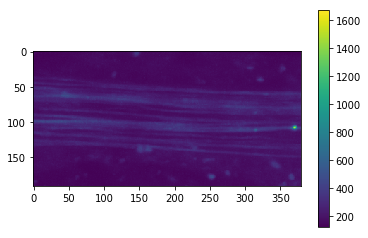

In [46]:
plt.imshow(projection)
plt.colorbar()

We can alter how this gets displayed in many ways (see documentation on `plt.imshow`).

Here are a few examples:

Text(0.5, 1.0, 'Axons MIP')

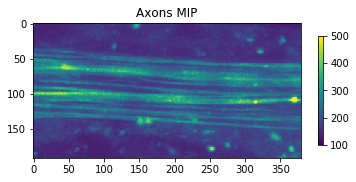

In [45]:
plt.imshow(projection, vmin=100, vmax=500)
plt.colorbar(shrink=0.5, ticks=range(0, 501, 100))
plt.title("Axons MIP")

<a id="0344a55e-08df-4d41-8c68-40d63e21e1d8"></a>
## Exporting our MIP as a new TIF file
<a href="#Overview">Return to overview</a>

Now let's say we didn't want to just plot the new image but rather save it as a new file. We can do this several different ways. Unfortunately, czifile does not allow us to write out .czi files; it only allows us to read them (more reasons to use open source formats). However, we can export NumPy arrays as .tif files using many methods. For this example we will use [Pillow](https://pillow.readthedocs.io/en/latest/#). 

<a id="193e433a-7cb7-4528-b2f4-6dd34f0fdd4c"></a>
### Excercise 3
<a href="#Overview">Return to overview</a>
<a id="844b2563-3eda-4ab0-976c-7efaa912facd"></a>
#### Exporting our MIP
<a href="#Overview">Return to overview</a>

Next, we will use some functions to save our MIP array into a new .tif file. To do this, we imported Image from PIL at the beginning.

Image has the method `fromarray` that will create an image memory from an object exporting the array interface.

Use the method `fromarray` on our array `projection` and store the result in the variable `im`.

Lastly, save `im` to a new file titled `projection.tif` with the `save` method.

In [67]:
im = Image.fromarray(projection)
im.save('projection.tif')

This next cell should plot the image you just saved.

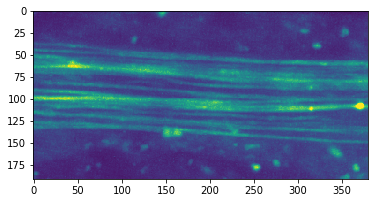

In [68]:
import matplotlib.image as mpimg
img = mpimg.imread('projection.tif')
plt.imshow(img, vmin=100, vmax=500)

<a id="ee0d0ccc-26db-4b61-b6c4-5f53484fc044"></a>
## Defining functions
<a href="#Overview">Return to overview</a>
One of the most useful aspects of coding is to automate the things that you will do over and over again in order to save you time. One way to do this is to define a function. Then we can call that function on any image we want. Here we will go over the basics of defining our own functions.

In the cell below, we define a function `my_func` that takes one argument `arg`.

It uses the method `upper` to convert the `arg` to all uppercase letters, and then it returns the uppercase version of the text. We have called the function from within a `print` statement so we can visualize what is returned (the uppercase version of the text).

In [69]:
def my_func(arg):
    upper_case = arg.upper()
    return upper_case

print(my_func("This is my function!"))
print(my_func("functions are useful"))

THIS IS MY FUNCTION!
FUNCTIONS ARE USEFUL


<a id="c5e9729f-8219-4358-ad16-3c91df86cda7"></a>
### Exercise 3
<a href="#Overview">Return to overview</a>
<a id="d239fd26-7ff6-471d-aabf-ee78366b6202"></a>
#### Defining a function to create a MIP from our .czi file
<a href="#Overview">Return to overview</a>

Define a function called `max_project` that takes one argument `image`. <br>
This function should create a maximum intensity projection using the logic from above.<br>
Then, save it as a new .tif file called __"MIP.tif"__.
Return the maximum intensity projection array.

To implement the function, call `max_project` on `my_image` (our array from czifile).

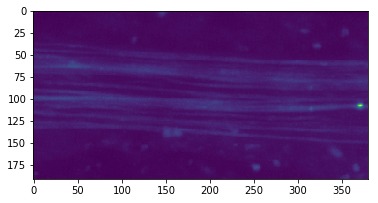

In [77]:
def max_project(image):
    projection = np.max(image[0,0,:,:,:,0], axis=0)
    im = Image.fromarray(projection)
    im.save('MIP.tif')
    return projection

plt.imshow(max_project(my_image))

We can also do other things with our image besides creating a MIP. We can also take slices and project those and export them using similar methods. Let's go through one more example of what we can do with a 3D image as an array by slicing our image and plotting an orthogonal view in the middle of the x-axis. Meaning, we will plot the (Z,Y) plane at a single location along the x-axis. This can be useful in the case of these images if we want to estimate how big the bundle of axons is in our images. This can be obscured in a MIP but by viewing the nerve from an orthogonal view we can better see roughly how many axons are present in the nerve.

<a id="9ebad2b0-9618-461d-825f-4eff159d1644"></a>
### Exercise 4
<a href="#Overview">Return to overview</a>
<a id="0d30a5d1-0dab-4309-bfb3-be90de705adc"></a>
#### Creating an orthogonal image from a z-stack
<a href="#Overview">Return to overview</a>

First, we will unpack the tuple from the shape function in order to create variables for the axes that you will work with.<br>
Again, we only care about the (Z, Y, X) axes, so we are ignoring the other three using `_` as a placeholder.


In [72]:
_, _, z_axis, y_axis, x_axis, _ = my_image.shape

Now that we have each axis defined as a variable, how would we find the middle value in the x-axis?<br>
Define `x` to represent this value. 
__Hint: we need an integer and not a float since we will use it as an index.__ 

Then, plot the image using the middle value of the x-axis (`x`) in place of the "X" dimension of `my_image`.

380


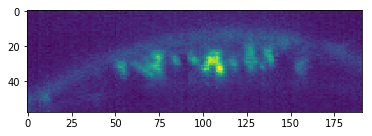

In [75]:
print(x_axis)
x = int(x_axis/2)
plt.imshow(my_image[0,0,:,:,x,0])

Now let's write a function that creates and saves an orthogonal image from the center of the x-axis.

Define a function `x_center_orthog` that takes one argument, `image`

Reusing your code above, use the shape of the_image to unpack the x-axis. Find the center of the x-axis and save your array as a new image, "x_orthog.tif".

Call the function on our `my_image`

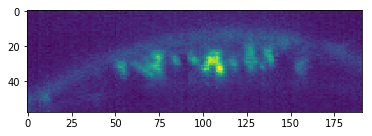

In [78]:
def x_center_orthog(image):
    _, _, z_axis, y_axis, x_axis, _ = my_image.shape
    x = int(x_axis/2)
    projection = image[0,0,:,:,x,0]
    im = Image.fromarray(projection)
    im.save('x_orthog.tif')
    return projection

plt.imshow(x_center_orthog(my_image))

<a id="a454acde-d867-469a-baab-5eb6bdf52c91"></a>
## Automating
<a href="#Overview">Return to overview</a>

*Finally, we will put this all together and create a script that iterates through all of the image files in a folder, and which runs our functions to create a MIP and orthogonal TIF file for each image.*

First, let's establish the functions that will be called. One function which you've already created is the `max_project` function, which takes in an image array and creates a maximum intensity projection. We will be using this function to save multiple different MIP images, so we will modify this function to take a second argument `filename` so that we can save each .tif with a different name.
<br><br> In the box below reuse your `max_project` function but rename it `max_projection` (as it will be slightly different than the previous) and introduce a new, second argument `filename` to the function. With this new argument, modify the `im.save` step of the function using [f-string](https://realpython.com/python-f-strings/) formatting to save each new projection image as a unique filename with the ending __"_MIP.tif"__. Do not worry about extracting the filename from the file just yet, we will do that shortly. You can assume that the new argument `filename` will be a string of your original file's name.

Saving MIP to test_MIP.tif


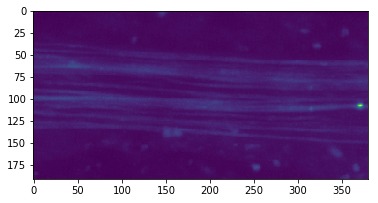

In [81]:
def max_projection(image, filename):
    projection = np.max(image[0,0,:,:,:,0], axis=0)
    im = Image.fromarray(projection)
    outfile = f'{filename}_MIP.tif'
    print(f'Saving MIP to {outfile}')
    im.save(outfile)
    return projection

plt.imshow(max_projection(my_image,'test'))

The other function that will be called is `x_center_orth` which will be used to create and save an orthogonal image for each of our files. Again, we need to pass in another argument (`filename`) so that each file can be saved with a unique name. Otherwise, each new file would overwrite the first. Below modify your `x_center_orthog` function from above as you did with `max_projection` to save unique filenames.

Saving x-centered orthogonal image to test_MIP.tif


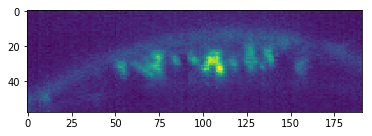

In [83]:
def x_center_orth(image, filename):
    _, _, z_axis, y_axis, x_axis, _ = my_image.shape
    x = int(x_axis/2)
    projection = image[0,0,:,:,x,0]
    im = Image.fromarray(projection)
    outfile = f'{filename}_MIP.tif'
    print(f'Saving x-centered orthogonal image to {outfile}')
    im.save(outfile)
    return projection

plt.imshow(x_center_orth(my_image,'test'))

Now that we have our functions defined, let's find the folders and images we want to work with.

First we need to tell the script where to look for our image files. The folder path and the names of the folders may change between times that you run this code so we will use `input()` to request the path to the folder. For this example you only need to type in "Images" to the prompt since the images are stored within a folder titled "Images" within the folder we are currently working in.

In [85]:
folder_path = input('Enter the path to the folder: ')
folder_path

Enter the path to the folder: images


'images'

We then create a list of all the image files in the folder specified by our `folder_path`, using the `iterdir` method of `Path`. We will later use this list to iterate over each image using a for loop.

In [86]:
folder_list = list(Path(folder_path).iterdir())
folder_list

[PosixPath('images/image1.czi'),
 PosixPath('images/image2.czi'),
 PosixPath('images/image3.czi')]

Sometimes there are other random files in the folder, usually called ".DS_Store." We want to ignore these files since they are not our image files.

We will create a `filtered_list` that takes all of the items in `folder_list` except for the ones that start with a period, ".". We can get the last part of a `Path` by using the `name` attribute.

In [ ]:
folder_list[0].name

In [ ]:
filtered_list = [fn for fn in folder_list if not fn.name.startswith('.')]
filtered_list

Now we are ready to run the list of image files through our series of functions. To do this, we will use a "for loop". For loops allow us to iterates over items in a list (i.e. our `filtered_list`) and perform a series of operations **for** each item (i.e. `image`) in the list.

<a id="8a70647c-c2f9-42af-9865-f39efa14810d"></a>
### Exercise 5
<a href="#Overview">Return to overview</a>
1. Create a for loop that iterates over each `image` in `filtered_list` from above. (for loops use the syntax:  `for item in list:` where "item" can be whatever variable you would like to use to refer to what is in your list (we will use "image" to be more descriptive) and "list" is where you identify the list that you want to iterate over.)
2. Next, still within the for loop, use the "with/as" statement and the `czifile.CziFile()` as before to convert each image file into an array and storing that to a variable called `image_array`.
3. Next, still within the for loop, create a new variable called `filename`, which extracts the original name of the `image` file but without the last four characters (i.e. the file extension: ".czi") by using the `stem` attribute of a `Path`.
4. Lastly, still within the for loop, call each of our functions, `max_projection` and `x_center_orth`, and pass these functions each of our `image_array`s along with their `filename`s to create new MIP and orthogonal images and saving them with unique filenames.

In [ ]:
# Your answer here

So, here are all of those snippets of code put together in one cell. This included some print functions so that we can see at each step what our file list looks like and which images were processed when we run the code:

In [ ]:
# Your answer here

<a id="0dff5c0b-e8e7-452d-96aa-75fbdb006fb6"></a>
## Useful resources
<a href="#Overview">Return to overview</a>
[StackOverflow](https://stackoverflow.com/)
<br>[Python Documentation](https://docs.python.org/3.6/contents.html)
<br>[Czifile](https://www.pydoc.io/pypi/czifile-0.1.1/autoapi/czifile/index.html)
<br>[TIFF](https://pypi.org/project/tifffile/)
<br>[HDF5](https://www.h5py.org/)
<br>[NumPy](http://www.numpy.org/)
<br>[Matplotlib](https://matplotlib.org/)
<br>[OS](https://docs.python.org/3.6/library/os.html)
<br>[Pillow](https://pillow.readthedocs.io/en/latest/#)